In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

region_nuts_kody = {
    "CZ010" : "Hlavní město Praha",
    "CZ020" : "Středočeský kraj",
    "CZ031" : "Jihočeský kraj",
    "CZ032" : "Plzeňský kraj",
    "CZ041" : "Karlovarský kraj",
    "CZ042" : "Ústecký kraj",
    "CZ051" : "Liberecký kraj",
    "CZ052" : "Královéhradecký kraj",
    "CZ053" : "Pardubický kraj",
    "CZ063" : "Kraj Vysočina",
    "CZ064" : "Jihomoravský kraj",
    "CZ071" : "Olomoucký kraj",
    "CZ072" : "Zlínský kraj",
    "CZ080" : "Moravskoslezský kraj"
}

osoby = 'https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/osoby.csv'
osoby = '../datasets/osoby.csv'
regiony = pd.read_csv(osoby,
                     parse_dates=['datum'], index_col=['datum']
                     )

#regiony.groupby(regiony.datum.dt.date)['Z'].sum()
#regiony.shape


regiony.tail()
mask = regiony['kraj_nuts_kod'] == 'CZ053'
regiony.loc[mask]
data_podle_regionu = {}

for kod in region_nuts_kody.keys():
    mask = regiony['kraj_nuts_kod'] == kod
    data = regiony.loc[mask]
    zeny = {}
    muzi = {}
    zeny_vsechny_mesice = data.loc[data['pohlavi'] == 'Z'] 
    muzi_vsechny_mesice = data.loc[data['pohlavi'] == 'M'] 
    
    zeny['bre20'] = zeny_vsechny_mesice['2020-03-01':'2020-03-31']
    muzi['bre20'] = muzi_vsechny_mesice['2020-03-01':'2020-03-31']
    
    
    zeny['dub20'] = zeny_vsechny_mesice['2020-04-01':'2020-04-30']
    muzi['dub20'] = muzi_vsechny_mesice['2020-04-01':'2020-04-30']
    
    zeny['kve20'] = zeny_vsechny_mesice['2020-05-01':'2020-05-31']
    muzi['kve20'] = muzi_vsechny_mesice['2020-05-01':'2020-05-31']
    
    zeny['cer20'] = zeny_vsechny_mesice['2020-06-01':'2020-06-30']
    muzi['cer20'] = muzi_vsechny_mesice['2020-06-01':'2020-06-30']
    
    zeny['cvc20'] = zeny_vsechny_mesice['2020-07-01':'2020-07-31']
    muzi['cvc20'] = muzi_vsechny_mesice['2020-07-01':'2020-07-31']
    
    zeny['srp20'] = zeny_vsechny_mesice['2020-08-01':'2020-08-31']
    muzi['srp20'] = muzi_vsechny_mesice['2020-08-01':'2020-08-31']
    
    zeny['zar20'] = zeny_vsechny_mesice['2020-09-01':'2020-09-30']
    muzi['zar20'] = muzi_vsechny_mesice['2020-09-01':'2020-09-30']
    
    zeny['rij20'] = zeny_vsechny_mesice['2020-10-01':'2020-10-31']
    muzi['rij20'] = muzi_vsechny_mesice['2020-10-01':'2020-10-31']
    
    
    
    def roztrid_podle_veku(x):
        z={}
        for k in x.keys():
            zeny0_14 = x[k].loc[x[k]['vek']<=14]
            m = (x[k]['vek']>14) & (x[k]['vek']<=24)
            zeny15_24 = x[k].loc[m]
            m = (x[k]['vek']>24) & (x[k]['vek']<=34)
            zeny25_34 = x[k].loc[m]
            m = (x[k]['vek']>34) & (x[k]['vek']<=44)
            zeny35_44 = x[k].loc[m]
            m = (x[k]['vek']>44) & (x[k]['vek']<=54)
            zeny45_54 = x[k].loc[m]
            m = (x[k]['vek']>54) & (x[k]['vek']<=64)
            zeny55_64 = x[k].loc[m]
            m = (x[k]['vek']>64) & (x[k]['vek']<=74)
            zeny65_74 = x[k].loc[m]
            m = (x[k]['vek']>74) & (x[k]['vek']<=84)
            zeny75_84 = x[k].loc[m]
            m = x[k]['vek']>84
            zeny85plus = x[k].loc[m]
        
            z[k]={
              "celkem": x[k].shape[0], 
               "vek": {
                    "0-14": zeny0_14.shape[0],
                    "15-24": zeny15_24.shape[0],
                    "25-34": zeny25_34.shape[0],
                    "35-44": zeny35_44.shape[0],
                    "45-54": zeny45_54.shape[0],
                    "55-64": zeny55_64.shape[0],
                    "65-74": zeny65_74.shape[0],
                    "75-84": zeny75_84.shape[0],                   
                    "85+": zeny85plus.shape[0]
               }
            }
        return z
        
        
    data_podle_regionu[kod]={
            'data':data,
            'zeny': roztrid_podle_veku(zeny),
            'muzi': roztrid_podle_veku(muzi)
    }
        
   
#data_podle_regionu['CZ010']['muzi']

In [161]:
# d = {'col1': [1, 2], 'col2': [3, 4]}
def df_podle_veku(v):
    d={}   
        
    vek_kategorie = v['bre20']['vek'].keys()
    for vek in vek_kategorie:
        d[vek]=[]
        for k in v.keys():
            d[vek].append(v[k]['vek'][vek])
       
    return pd.DataFrame(data=d, index=v.keys())

def vek_kategorie(v):
    l = []
    for k in v['bre20']['vek'].keys():
        l.append(k)
    return l
    

df_podle_veku(data_podle_regionu['CZ010']['muzi']).head(10)

,0-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
bre20,27,42,99,94,79,66,41,25,22
dub20,26,27,75,67,40,46,35,26,11
kve20,11,25,50,44,34,15,14,3,2
cer20,20,16,42,54,34,14,7,3,8
cvc20,28,171,133,71,60,22,23,3,1
srp20,52,199,422,217,146,52,25,20,6
zar20,478,997,1311,1011,685,371,186,109,31
rij20,874,1163,2456,2216,1752,1104,646,331,133


In [162]:
def cplot(fig, ax, df, column_str, title, bars=False, color=None):
    #fig, ax = plt.subplots(figsize=(12, 12))
    clms = []
    if not isinstance(column_str, list):
        clms = [column_str]
    else:
        clms = column_str
        
    if bars:
        for c in clms:
            ax.bar(
                df.index.values,
                df[c],
                color=color
            )
    else:
        for c in clms:
            ax.plot(df.index.values,
               df[c],
               marker='o',
               color=color)

# Set title and labels for axes
    ax.legend(clms)
    ax.set(xlabel="Datum",
       ylabel=column_str,
       title=title)
    #plt.show()



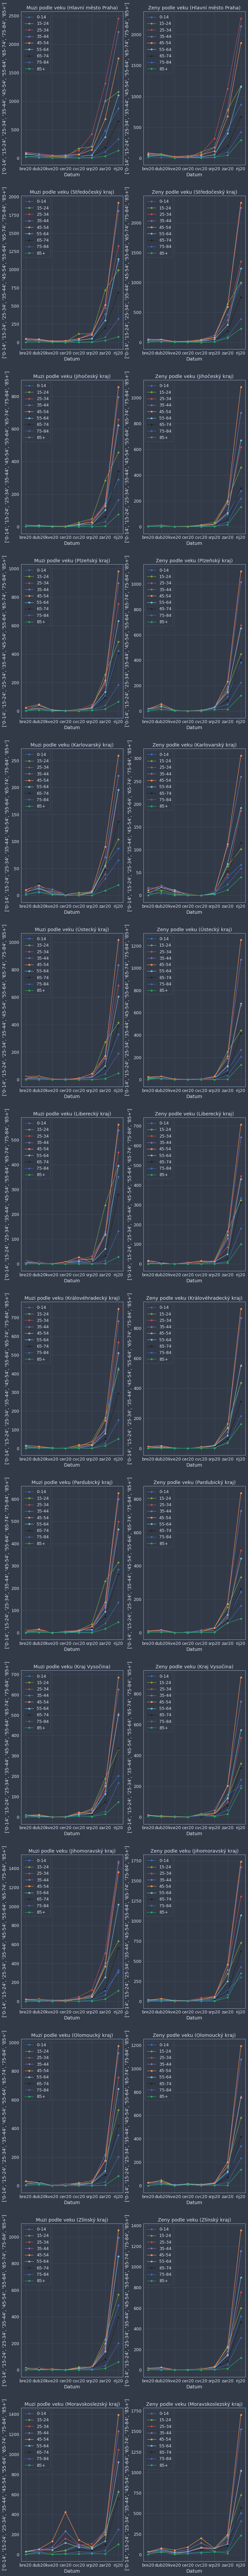

In [163]:
vek = vek_kategorie(data_podle_regionu['CZ010']['muzi'])

fig, ax = plt.subplots(14, 2 , figsize=(12, 140))


i = 0
for r in data_podle_regionu.keys():
    jmeno_regionu = region_nuts_kody[r]
    df_m = df_podle_veku(data_podle_regionu[r]['muzi'])
    df_z = df_podle_veku(data_podle_regionu[r]['zeny'])
    cplot(fig, ax[i,0], df_m, vek, "Muzi podle veku ("+jmeno_regionu+")")
    cplot(fig, ax[i,1], df_z, vek, "Zeny podle veku ("+jmeno_regionu+")")
    i+=1

#df_m = df_podle_veku(data_podle_regionu['CZ051']['muzi'])
#df_z = df_podle_veku(data_podle_regionu['CZ051']['zeny'])
#cplot(fig, ax[1,0], df_m, vek, "Muzi podle veku (Liberec)")
#cplot(fig, ax[1,1], df_z, vek, "Zeny podle veku (Liberec)")


plt.show()
#vek

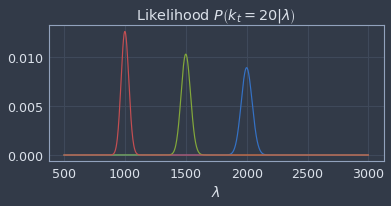

In [299]:
from scipy import stats as sps
from scipy.interpolate import interp1d
import numpy as np
k = 2000

lam = np.linspace(500, 3000, 1000)

likelihood = pd.Series(data=sps.poisson.pmf(k, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood.plot(title=r'Likelihood $P\left(k_t=20|\lambda\right)$', figsize=(6,2.5));
likelihood2 = pd.Series(data=sps.poisson.pmf(1500, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood2.plot(title=r'Likelihood $P\left(k_t=20|\lambda\right)$', figsize=(6,2.5));
likelihood3 = pd.Series(data=sps.poisson.pmf(1000, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood3.plot(title=r'Likelihood $P\left(k_t=20|\lambda\right)$', figsize=(6,2.5));

In [300]:
hundreds = []
for i in range(df.shape[0]):
    record = df.iloc[i]
    hundreds.append(int(0.5+record['klouzave_prirustky']/100))
    #hundreds.append(int(0.5+record['prirustkovy_pocet_nakazenych']/100))

    
hundreds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 7,
 8,
 9,
 9,
 11,
 11,
 12,
 13,
 14,
 17,
 18,
 18,
 19,
 19,
 20,
 21,
 20,
 22,
 21,
 22,
 22,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 32,
 35,
 38,
 45,
 48,
 50,
 51,
 57,
 63,
 69,
 72,
 78,
 81,
 86,
 92,
 99]

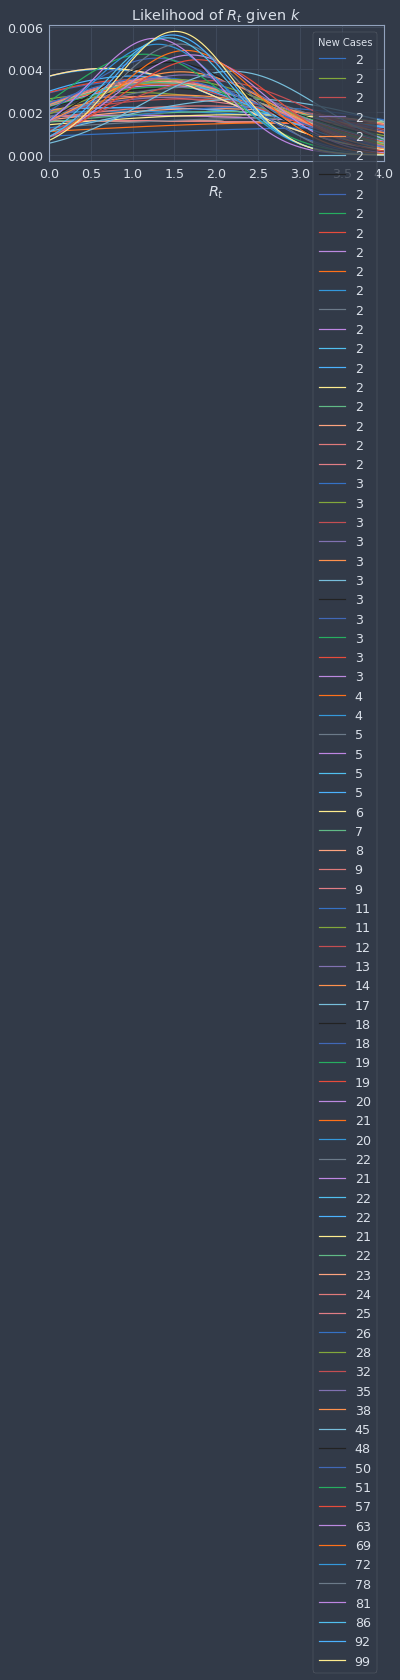

In [301]:
#k = np.array([9544, 9722, 11104, 8712, 5058, 8076, 11984, 14968])



#k = np.array([83, 95, 97, 111, 87, 50, 81, 120, 150])

k = np.array(hundreds[150:])

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article
# https://www.nejm.org/doi/full/10.1056/NEJMoa2001316
GAMMA = 1/7

# Map Rt into lambda so we can substitute it into the equation below
# Note that we have N-1 lambdas because on the first day of an outbreak
# you do not know what to expect.
lam = k[:-1] * np.exp(GAMMA * (r_t_range[:, None] - 1))

# Evaluate the likelihood on each day and normalize sum of each day to 1.0
likelihood_r_t = sps.poisson.pmf(k[1:], lam)
likelihood_r_t /= np.sum(likelihood_r_t, axis=0)

# Plot it
ax = pd.DataFrame(
    data = likelihood_r_t,
    index = r_t_range
).plot(
    title='Likelihood of $R_t$ given $k$',
    xlim=(0,4),
    figsize=(6,2.5)
)

ax.legend(labels=k[1:], title='New Cases')
ax.set_xlabel('$R_t$');

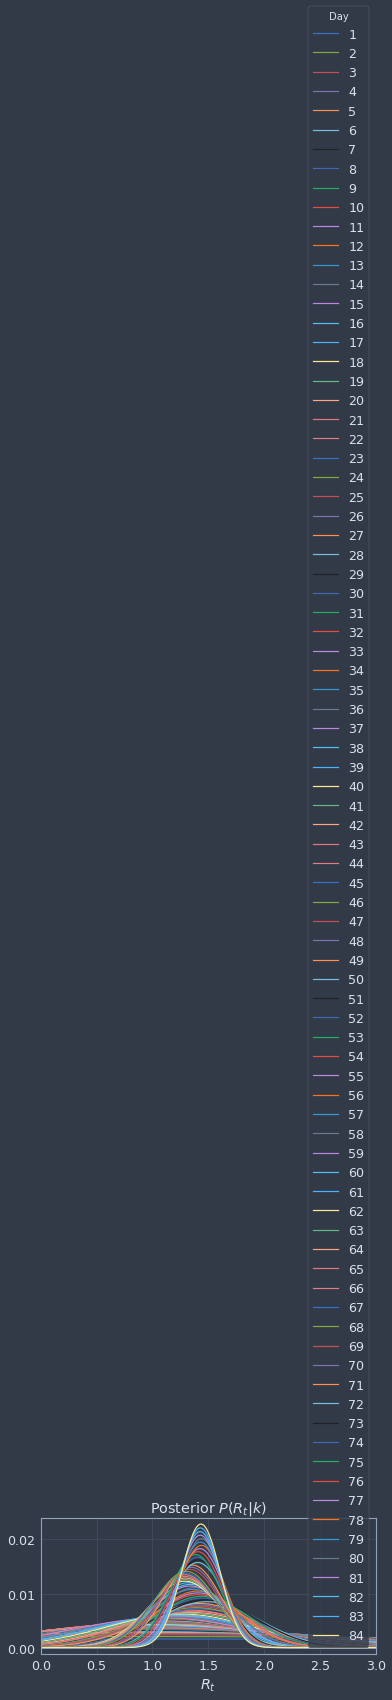

In [302]:
posteriors = likelihood_r_t.cumprod(axis=1)
posteriors = posteriors / np.sum(posteriors, axis=0)


columns = pd.Index(range(1, posteriors.shape[1]+1), name='Day')



posteriors = pd.DataFrame(
    data = posteriors, #[:,30:31],
    index = r_t_range,
    columns = columns #[30:31]
)
ax = posteriors.plot(
    title='Posterior $P(R_t|k)$',
    xlim=(0,3),
    figsize=(6,2.5)
)
ax.legend(title='Day')
ax.set_xlabel('$R_t$');

In [303]:
most_likely_values = posteriors.idxmax(axis=0)
most_likely_values

Day
1     1.00
2     1.00
3     1.00
4     1.00
5     1.00
      ... 
80    1.44
81    1.43
82    1.43
83    1.43
84    1.44
Length: 84, dtype: float64

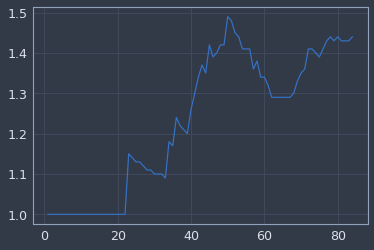

In [304]:
plt.plot(most_likely_values)